# Preprocessing Data
## Import Dependencies

In [1]:
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

In [3]:
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]
ps = PorterStemmer()
print([ps.stem(w) for w in example_words if len(w)>3])

['python', 'python', 'python', 'python', 'pythonli']


# Tokenization and Cleaning
Below we tokenize the articles using some of the nltk libraries.

In [22]:
stop_words = set(stopwords.words('english'))

def split_data(lines): 
    """splits the summary from the body and names the body lines"""
    flag = False
    for i in range(len(lines)):
        if lines[i][0] == '\n':
            summary = lines[:i]
            line = lines[i:]
            flag = True
    if flag is False:
        summary, line = None, None
    return summary, line
        

def split_string(lines):
    sent_tokens = []
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    return sent_tokens

def split_summary(lines):
    sent_tokens = ["_START_"]
    for line in lines:
        line = re.sub("\n", "", line)
        line = re.sub("\\\\.", "", line)
        line = re.sub("===", "", line)
        line = " ".join(["_START_", line, "_END_"])
        for sent in sent_tokenize(line):
            sent_tokens.append(sent)
    sent_tokens.append("_END_")
    return sent_tokens

def clean(string, ps):
    word_tokens = word_tokenize(string)
    filtered_sentence = [ps.stem(w) for w in word_tokens if (not w in stop_words) and (len(w)>3)]
    return filtered_sentence 

## We find the most suitable maximal length in this article 
We do this to not have to not have an overly large dataset.

Abdon_Atangana.txt
Abel_equation.txt
Abelian_group.txt
Abelian_variety.txt
Abelian_von_Neumann_algebra.txt
Abraham_Robinson.txt
Absolute_geometry.txt
Abstract_algebra.txt
Abstract_algebraic_logic.txt
Abstract_analytic_number_theory.txt
Actor–network_theory.txt
Additive_number_theory.txt
Adelic_algebraic_group.txt
Affine_Lie_algebra.txt
Affine_combination.txt
Affine_connection.txt
Affine_geometry.txt
Affine_plane_(incidence_geometry).txt
Affine_space.txt
Affine_transformation.txt
Alexander_Grothendieck.txt
Alexandra_Bellow.txt
Algebra.txt
Algebra_over_a_field.txt
Algebraic_&_Geometric_Topology.txt
Algebraic_K-theory.txt
Algebraic_analysis.txt
Algebraic_cobordism.txt
Algebraic_combinatorics.txt
Algebraic_curve.txt
Algebraic_geometry.txt
Algebraic_geometry_and_analytic_geometry.txt
Algebraic_group.txt
Algebraic_logic.txt
Algebraic_number.txt
Algebraic_number_field.txt
Algebraic_number_theory.txt
Algebraic_semantics_(mathematical_logic).txt
Algebraic_stack.txt
Algebraic_structure.txt
Algeb

<ipython-input-24-c93cafe0ec90>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(text_overall).shape, len(summary_overall))


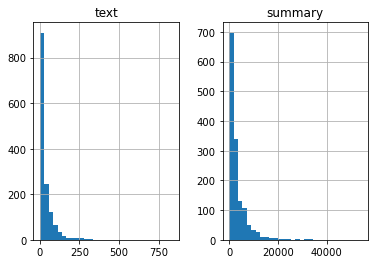

In [24]:



def data_preprocess(directory= '../../data'):
    text_overall, summary_overall  = [], []
    text_count, summary_count = [], []
    ps = PorterStemmer()
    for filename in os.listdir(directory):
        with open('../../data/'+filename) as f:
            print(filename)
            lines = f.readlines()
            f.close()

            summary, lines = split_data(lines)
            if lines is None:
                continue
            summary, lines = split_summary(summary), split_string(lines)

            clean_text = []
            tex_count = 0
            for line in lines:
                temp = clean(line)
                if temp != []:
                    tex_count += (len(temp))
                    for t in temp:
                        clean_text.append(t)  
            text_overall.append(clean_text)
            text_count.append(tex_count)

            clean_summary = []
            sum_count = 0
            for line in summary:
                temp = clean(line)
                if temp != []:
                    sum_count+= (len(temp))
                    for t in temp:
                        clean_summary.append(t)
            summary_overall.append(clean_summary)
            summary_count.append(sum_count)
data_preprocess()       
print(summary_count[:10])
print(text_count[:10])
print(np.array(text_overall).shape, len(summary_overall))
overview = pd.DataFrame({'text':text_count, 'summary':summary_count})
overview.hist(bins=30)
plt.show()

## Store sentence vectors:
We store a matrix of sentence vectors where each sentence is a vector and within each index stores the and index in the dictionary corresponding to the word.
The end of the sequences are padded with 0's.

In [25]:
max_text_len = 20000
max_summary_len = 200
x_train, x_test, y_train, y_test = train_test_split(text_overall, summary_overall, test_size=0.1, shuffle=True)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')
x_test = pad_sequences(x_train, maxlen=max_text_len, padding='post', truncating='post')

print(x_train[:10])
x_voc_size = len(tokenizer.word_index)+1
print(x_voc_size)

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(y_train)

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')
y_test = pad_sequences(y_train, maxlen=max_summary_len, padding='post', truncating='post')

print(y_train[:10])
y_voc_size = len(tokenizer.word_index)+1
print(y_voc_size)

[[   4    3  147 ...    0    0    0]
 [   4    3  924 ...    0    0    0]
 [   8  148 2411 ...    0    0    0]
 ...
 [   4    3  443 ...    0    0    0]
 [   8    0    0 ...    0    0    0]
 [   8 2433 3952 ...    0    0    0]]
11866
[[   1    1  115 ...    2    1  300]
 [   1    1   44 ...    1    2    1]
 [   1    1  197 ...    1    2    1]
 ...
 [   1    1   44 ...    1    2    1]
 [   1    1  279 ...    0    0    0]
 [   1    1  111 ... 4465   51  216]]
11866


## Save the preprocessed data to file

In [16]:
np.savez('preprocessed', x_train=x_train, x_test=x_test, y_train=y_train,y_test=y_test, 
                             max_text_len=max_text_len, max_summary_len=max_summary_len, x_voc_size=x_voc_size, y_voc_size=y_voc_size)